In [1]:
"""
Author: Bowie Chau
Student Number: 501179245
Date Created: March 07, 2023
"""

'\nAuthor: Bowie Chau\nStudent Number: 501179245\nDate Created: March 07, 2023\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
survey_results = pd.read_csv("survey412.csv") 
# Remove empty columns and short answer questions
no_short_answer = survey_results.loc[:, ~survey_results.columns.isin(['Timestamp', 'Unnamed: 9', 'Unnamed: 12', 'What are some benefits of using ChatGPT for educational purposes? (Point form is fine)', 'What are some limitations of using ChatGPT for educational purposes? (Point form is fine)'])]

In [4]:
def get_data(chart, head_index, *search_key):
    """ 
    Search for a specific response to a given question and removes all others
    Indexes for HEAD:
    0 - How old are you?
    1 - What is your field of study?
    2 - Year of study
    3 - What consumes most of your time?
    4 - Gender
    5 - Internet usage
    6 - Internet usage (school purposes)
    7 - ChatGPT usage
    8 - Quality of education
    9 - ChatGPT usages
    
    :param chart: pandas dataframe to search through
    :param header_index: The question that is being looked at
    :param search_key: The answers that we wish to keep
    :return: a dataframe with only the responses desired
    """
    
    HEAD = tuple(no_short_answer)  # Tuple constant containing all questions from survey
    for i in chart.index:
        if chart.loc[i, HEAD[head_index]] not in search_key:
            chart.drop(i, inplace = True)
    return chart

In [5]:
def create_pie(chart, head_index):
    """ 
    Create a pie chart looking at frequency of answers for a given question
    Indexes for HEAD:
    0 - How old are you?
    1 - What is your field of study?
    2 - Year of study
    3 - What consumes most of your time?
    4 - Gender
    5 - Internet usage
    6 - Internet usage (school purposes)
    7 - ChatGPT usage
    8 - Quality of education
    9 - ChatGPT usages
    
    :param chart: pandas dataframe to search through
    :param header_index: The question that is being looked at
    :return: None
    """
    HEAD = tuple(no_short_answer)  # Tuple constant containing all questions from survey
    QUESTION = HEAD[head_index]  # Constant containing the question
    
    answer_frequency = {}
    # Initialize all unique answers to value 0
    for i in chart[QUESTION].unique():
        answer_frequency[i] = 0
    # Check answers, increment corresponding key in dictionary
    for i in chart.index:
        answer_frequency[chart.loc[i, QUESTION]] += 1
    
    # Remove all zero values to ignore it during pie chart creation 
    # This is done to avoid a label being made for a zero value
    answer_frequency = {k:v for k,v in answer_frequency.items() if v != 0}
    labels = list(answer_frequency.keys())
    sizes = list(answer_frequency.values())

    # Create pie chart
    fig, ax = plt.subplots()
    
    ax.pie(sizes, labels=labels, autopct='%1.1f%%')
    return
    

def allowed_usage(chart):
    """
    Creates a bar graph showing what ChatGPT should be allowed to be used for
    
    :param chart: data frame to read
    :return: None
    """
    
    allowed = {"Homework": 0, "Research": 0, "Assignments": 0, "Online Assessments (tests/quizzes)": 0,
               "Questions about material": 0, "Essays": 0}
    
    # Create a list of answers for a response and tallys them to the corresponding index
    for i in chart.index:
        used_for = chart.loc[i, "Which of the following educational purposes do you think ChatGPT should be used for? (Select all that apply)"].split(", ")
        for j in used_for:
            allowed[j] += 1
        
    # Create bar graph and fix formatting
    labels = list(allowed.keys())
    labels[3] = "Online\nAssessments\n(tests/quizzes)"
    labels[4] = "Questions\nAbout\nMaterial"
    plt.figure(figsize=(8,6), dpi=80) # resize fig to allow x-axis labels to fit
    plt.grid(axis="y", alpha=0.5)
    plt.locator_params(axis="both", integer=True, tight=True)
    sizes = list(allowed.values())
    plt.bar(labels, sizes)
    return
    

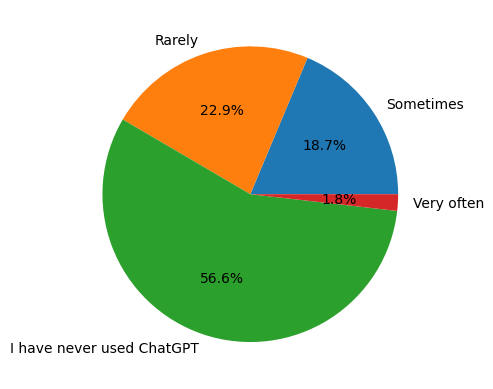

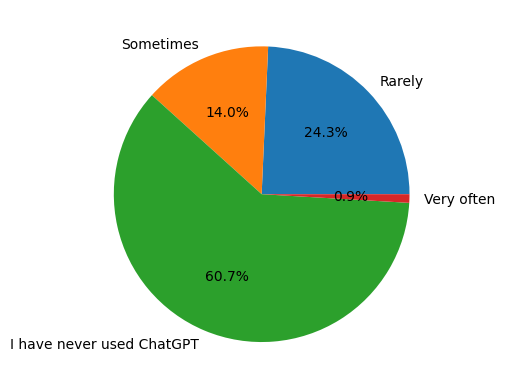

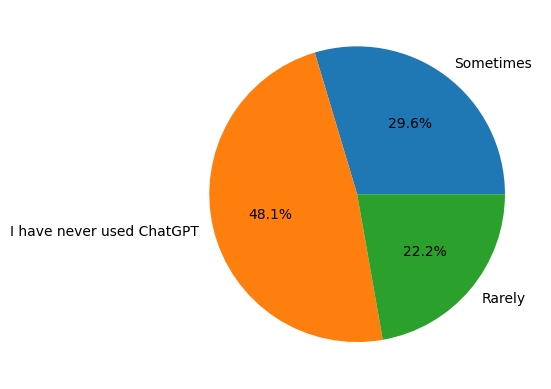

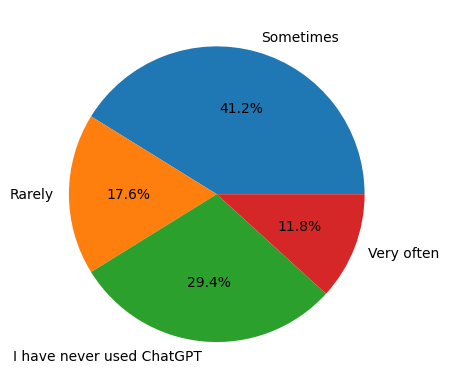

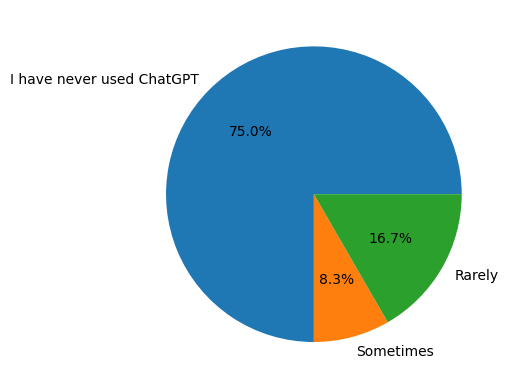

In [6]:
# Identify by field of study
business_only = get_data(no_short_answer.copy(), 1, "Business")
science_only = get_data(no_short_answer.copy(), 1, "Science")
eng_arch_only = get_data(no_short_answer.copy(), 1, "Engineering and Architecture")
art_only = get_data(no_short_answer.copy(), 1, "Arts")
# Determine ChatGPT usage by field of study (1st one is including all faculties)
create_pie(no_short_answer, 7)
create_pie(business_only, 7)
create_pie(science_only, 7)
create_pie(eng_arch_only, 7)
create_pie(art_only, 7)

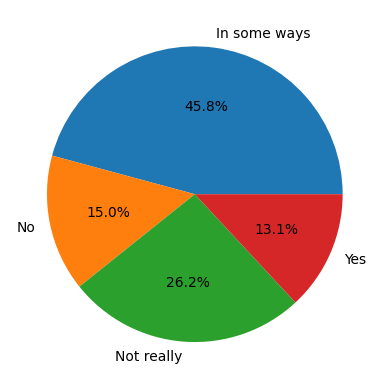

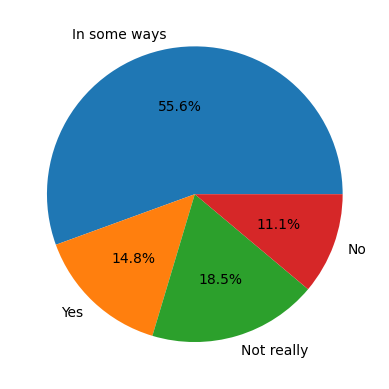

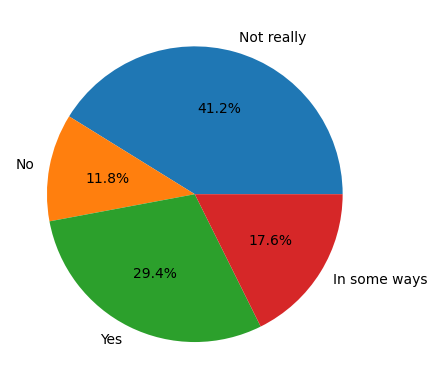

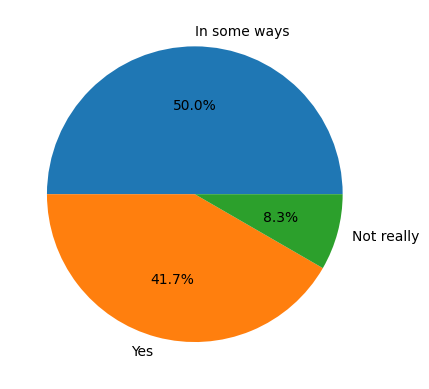

In [7]:
# Determine affect on education by field of study
create_pie(business_only, 8)
create_pie(science_only, 8)
create_pie(eng_arch_only, 8)
create_pie(art_only, 8)

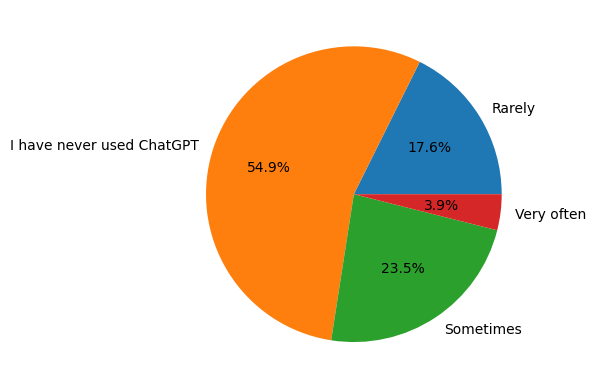

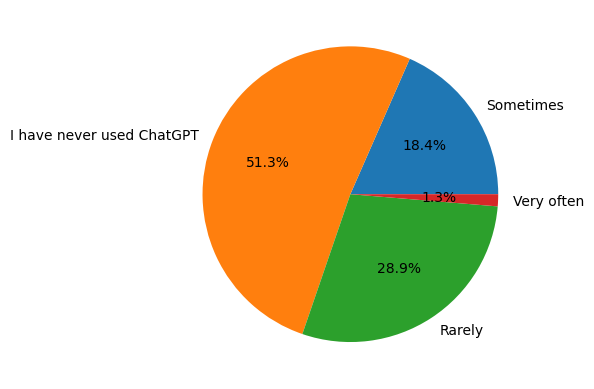

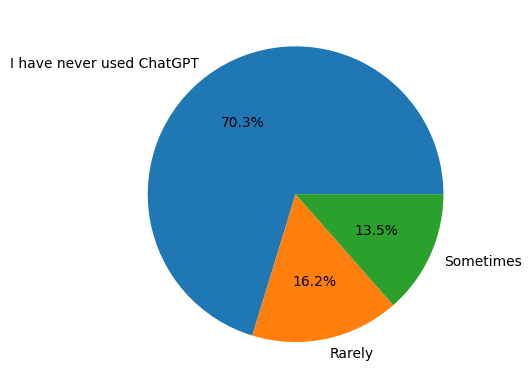

In [8]:
# Identify by Internet usage (school)
high_use = get_data(no_short_answer.copy(), 6, "Very Often")
moderate_use = get_data(no_short_answer.copy(), 6, "Often")
low_use = get_data(no_short_answer.copy(), 6, "Sometimes")

# Determine ChatGPT usage by Internet usage (school)
create_pie(high_use, 7)
create_pie(moderate_use, 7)
create_pie(low_use, 7)


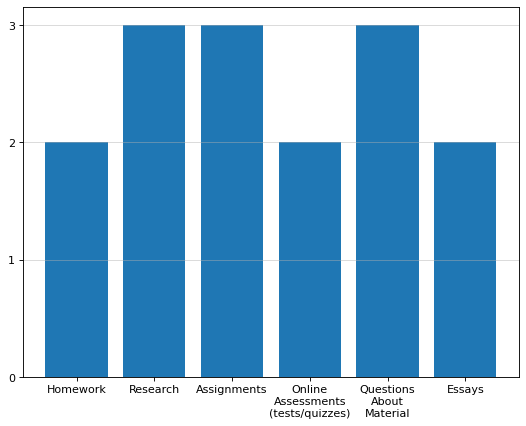

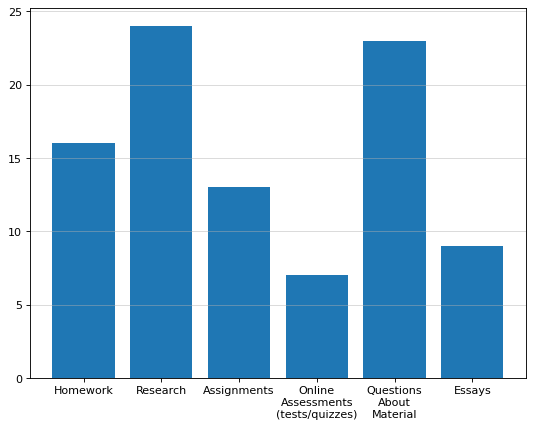

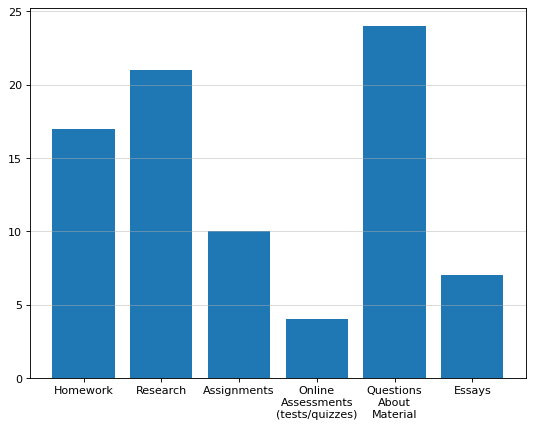

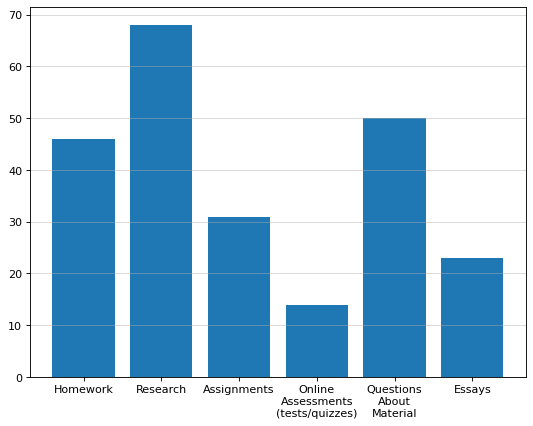

In [9]:
# Identify ChatGPT usage
gpt_use_high = get_data(no_short_answer.copy(), 7, "Very often")
gpt_use_moderate = get_data(no_short_answer.copy(), 7, "Sometimes")
gpt_use_low = get_data(no_short_answer.copy(), 7, "Rarely")
gpt_use_none = get_data(no_short_answer.copy(), 7, "I have never used ChatGPT")
# Determine what ChatGPT should be used for in academia
allowed_usage(gpt_use_high)
allowed_usage(gpt_use_moderate)
allowed_usage(gpt_use_low)
allowed_usage(gpt_use_none)

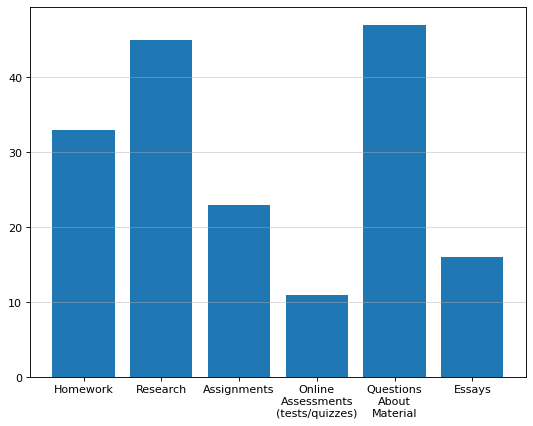

In [10]:
gpt = get_data(no_short_answer.copy(), 7, "Rarely", "Sometimes")
allowed_usage(gpt)